In [1]:
from fuzzy_variable import FuzzyVariable
import numpy as np 


In [2]:
cats3= ['low', 'average', 'high']
cats_soft_skills = ['low', 'average', 'decent', 'great']
cats_suitability = ['low', 'average', 'good']

step = 0.01

education = FuzzyVariable("education", np.arange(0, 25, step), 3, cats3, 
                          [[0, 0, 10, 12], [10, 13, 17], [13, 16, 25, 25]])

experience = FuzzyVariable("experience", np.arange(0, 20, step), 3, cats3, 
                           [[0, 0, 1, 3], [1, 4, 7], [3, 7, 25, 25]])

soft_skills = FuzzyVariable("soft_skills", np.arange(0, 100, step), 4, cats_soft_skills,
                            [[0, 0, 35, 50], [20, 50, 75], [55, 75, 90], [70, 90, 100, 100]])

volunteering = FuzzyVariable("volunteering", np.arange(0, 20, step), 3, cats3, 
                             [[0, 0, 2, 6], [2, 7, 12], [3, 12, 20, 20]])

suitability = FuzzyVariable("suitability", np.arange(0, 100, step), 3, cats_suitability,
                            [[0, 0, 20, 45], [20, 45, 60, 80], [65, 85, 100, 100]])


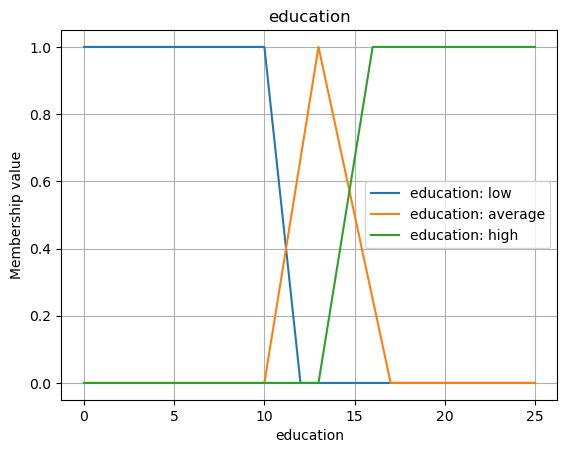

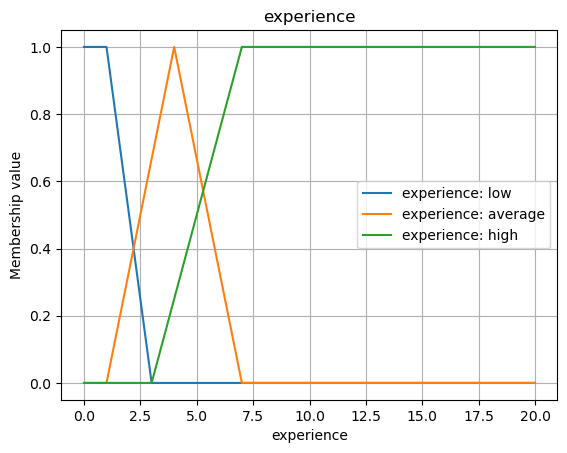

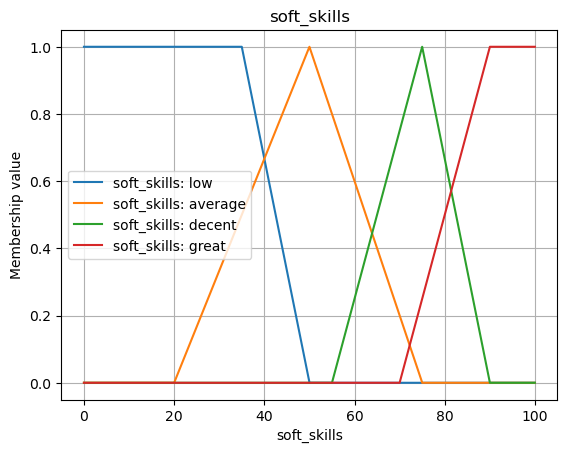

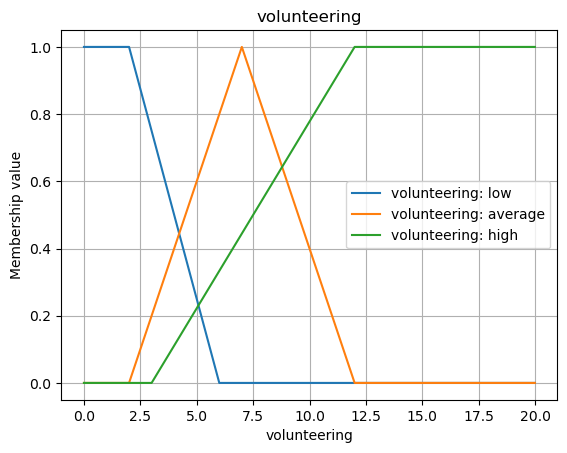

In [3]:
education.plot_categories()
experience.plot_categories()
soft_skills.plot_categories()
volunteering.plot_categories()

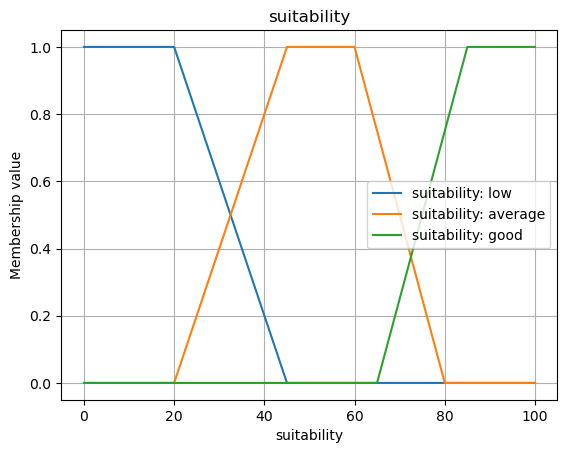

In [4]:
suitability.plot_categories()

In [5]:
np.max(suitability.x_bounds)
len(suitability.categories['good'])

10000

In [6]:
from fuzzy_logic import FuzzyLogic

In [7]:
tool = FuzzyLogic([education, experience, soft_skills, volunteering], suitability)
vals = [14, 3, 95, 4]
#vals = [14, 2, 85, 1]  #- irgi visai nieko
#vals = [18, 2, 70, 0] #- gives good varied results
vals_before_rules = tool.fuzzification(vals)

In [8]:
vals_before_rules

{'education': {'low': 0, 'average': 0.75, 'high': 0.3333333333333333},
 'experience': {'low': 0, 'average': 0.6666666666666666, 'high': 0},
 'soft_skills': {'low': 0, 'average': 0, 'decent': 0, 'great': 1},
 'volunteering': {'low': 0.5, 'average': 0.4, 'high': 0.1111111111111111}}

In [9]:
# To do:
# - Perform implication using rules

{'low': 0, 'average': 0, 'good': 0.6666666666666666}
SOM 78.14
MOM 78.33500000000001


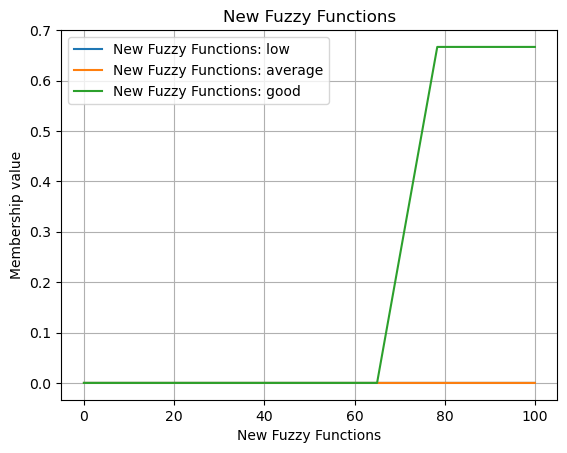

Points after filtering: [(0, 0.0), (65, 0.0), (78.14, 0.6564999999999998), (100, 0.6666666666666666)]
Trikampis  = Taškai (65, 0.0), (78.14, 0.6564999999999998)
Plotas: 4.313204999999998, Centroidas: 73.76
Trapecija  = Taškai (78.14, 0.6564999999999998), (100, 0.6666666666666666)
Plotas: 14.462211666666663, Centroidas: 89.04200613007515
[4.313204999999998, 14.462211666666663]
[73.76, 89.04200613007515]
18.77541666666666
1605.8863406777773


In [10]:
from utils import get_values_dict
rez = tool.defuzzification(vals_before_rules)

In [11]:
print(rez)

85.53132903456796


In [12]:
# Trūksta average variantų coverage
# Pataisyk taisyklių rinkinį

~~~
max_x_values = [x for x in x_values if trapezoidal_function(x) == membership_value]
b = min(max_x_values)
c = max(max_x_values)
~~~

Galima būtų po šito 
1. padaryti naujas trapecijas, kurios persidengia. 
2. Naudojant tą patį step, surasti kur jų y reikšmės sutampa ir išsaugoti toje vietoje esančias x reikšmes
3. Iteruoju per pirmą funkciją, kol pasiekiu susikirtimo tašką.
4. Palyginu per sekantį žingsnį abiejų funkcijų reikšmes.
5. Jei einamosios funkcijos f(x+1) reikšmė mažesnė už sekančios funkcijos membership_value, imu iteruoti per sekančią funkciją nuo susikirtimo taško. Reikšmės y ir x susikirtimo taško išsaugomos
6. Jei einamosios funkcijos f(x+1) reikšmė yra didesnė nei sekančios funkcijos, toliau iteruojama per einamąją iki kol tenkinama 5 žingsnio sąlyga arba pasiekiama y = 0 reikšmė.

Iteruojama per surinktų taškų rinkinį. Tašką sudaro x,y koordinatės. Pagal santykį tarp 2 iš eilės einamų taškų, nustatoma figūra, apskaičiuojamas jos plotas ir centroidas.

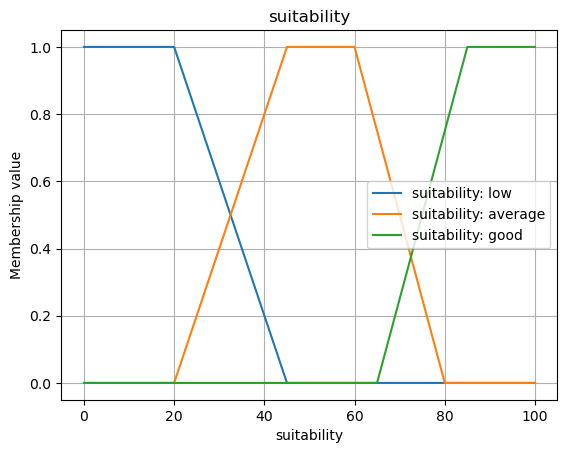

In [13]:
suitability.plot_categories()